In [1]:
#chainerのインストール
! pip install -U chainer==2.0

Requirement already up-to-date: chainer==2.0 in /Users/shota/anaconda/lib/python3.6/site-packages
    100% |████████████████████████████████| 389kB 877kB/s ta 0:00:01
    100% |████████████████████████████████| 4.7MB 145kB/s ta 0:00:01
Requirement already up-to-date: six>=1.9.0 in /Users/shota/anaconda/lib/python3.6/site-packages (from chainer==2.0)
Requirement already up-to-date: nose in /Users/shota/anaconda/lib/python3.6/site-packages (from chainer==2.0)
    100% |████████████████████████████████| 491kB 683kB/s ta 0:00:01
  Running setup.py bdist_wheel for filelock ... done
  Stored in directory: /Users/shota/Library/Caches/pip/wheels/ec/51/02/cc3d6bf57c084498a0f21aded40b9c1aa53ef635bb904947ae
Successfully built filelock
  Found existing installation: setuptools 38.2.4
    Uninstalling setuptools-38.2.4:
      Successfully uninstalled setuptools-38.2.4
  Found existing installation: protobuf 3.5.0.post1
    Uninstalling protobuf-3.5.0.post1:
      Successfully uninstalled protobuf-3

In [2]:
#必要なライブラリをインポート
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import computational_graph # グラフを出力するパッケージ
from chainer import serializers         # モデルを保存するパッケージ


/Users/shota/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#MNISTをnotebookが保存されているディレクトリに保存
from sklearn.datasets import fetch_mldata
MNIST = fetch_mldata('MNIST original')


In [4]:
#データと正解ラベルの確認

X = MNIST.data
y = MNIST.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [6]:
X = X.astype(np.float32)
y = y.astype(np.int32)



In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
# データを画像として出力する関数
def draw_digit(data):
    """数値の行列データを画像表示"""
    plt.figure(figsize=(3, 3))
    X, Y = np.meshgrid(range(28),range(28))
    Z = data.reshape(28, 28)
    Z = Z[::-1,:]
    plt.pcolor(X, Y, Z)
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")
    plt.gray()
    plt.show()

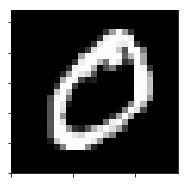

In [10]:
# データを画像として出力
# indexを指定して任意の画像を選択
index = 0
draw_digit(X[index])

In [11]:
y[index]

0

In [12]:
#ホールドアウト法でdeep learning をする
#trainとtestデータに分ける
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 0)


In [13]:
#サイズを確認
N_train = len(X_train)

In [14]:
N_train

49000

In [15]:
#ニューラルネットワークの定義
#4層のDeep Neural Network
#Chainer のChainクラスを継承

class MLP(chainer.Chain):
    #ニューラルネットワークの構造を定義
    def __init__(self):
        super().__init__(
        l1 = L.Linear(784,900),
        l2 = L.Linear(900,1000),
        l3 = L.Linear(1000,500),
        l4 = L.Linear(500,10),
        )

        #ニューラルネットワークの計算式を定義
    def __call__(self,X):
            h1 = F.relu(self.l1(X))
            h2 = F.relu(self.l2(h1))
            h3 = F.relu(self.l3(h2))
            return self.l4(h3)
        

In [16]:
# 分類器インスタンスの生成
# MLPクラスのインスタンスを引数として渡す
model = L.Classifier(MLP())

In [17]:
#optimizerの生成
optimizer = chainer.optimizers.Adam()
optimizer.setup(model) #モデルを読み込ませる

In [18]:
#ミニバッチに含まれるサンプル数の決定
batchsize = 100


In [19]:
#学習の繰り返し数を指定する
n_epoch = 20

In [20]:
# tqdmのインストール#for文の処理進度を可視化
!pip install tqdm

In [21]:
# for文の処理進捗をゲージで教えてくれるライブラリを利用
# tqdm_notebookはjupyter notebook専用
from tqdm import tqdm_notebook as tqdm

# .pyファイルを実行するときはtqdm.tqdmtqdmを利用
# from tqdm import tqdm

In [22]:
from socket import socket
socket

socket.socket

In [23]:
#N_testを生成
N_test = len(X_test)


# 精度の推移をグラフで観察するために､epochごとにlossとaccを記録する
# そのためのリストを初期化
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# 学習をn_epoch回繰り返す
for epoch in tqdm(range(n_epoch), leave=False):
    # 現在何epochめなのかを出力
    print('epoch', epoch + 1)

    
    # training    
    # trainデータのインデックスをランダムに並べ替える
    # epochごとにミニバッチをシャッフルすることが目的
    perm = np.random.permutation(N_train)
    
    # 誤差と精度の累積値を初期化
    sum_accuracy = 0
    sum_loss = 0
    
    # ミニバッチごとに学習
    for i in tqdm(range(0, N_train, batchsize), leave=False):
        # ミニバッチの作成
        # trainデータの中から100個ずつ取り出して利用
        X_batch = X_train[perm[i: i+batchsize]] 
        y_batch = y_train[perm[i: i+batchsize]]
        
        # ミニバッチ学習
        optimizer.update(model, X_batch, y_batch)
        
        # ミニバッチごとに誤差と精度を累積
        sum_loss += float(model.loss.data)
        sum_accuracy += float(model.accuracy.data)
    
    # trainでの誤差と精度の平均を出力
    mean_loss = sum_loss / (N_train / batchsize)
    mean_accuracy = sum_accuracy / (N_train / batchsize)
    print('train_mean_loss = {:.3f}, train_mean_accuracy = {:.3f}'.format(mean_loss, mean_accuracy))
    
    # リストにそのepochでの誤差と精度を追加
    train_loss.append(mean_loss)
    train_accuracy.append(mean_accuracy)
    
    
    # evaluation
    
    # 誤差と精度の累積値を初期化
    sum_loss = 0
    sum_accuracy = 0
    
    # ミニバッチごとにテスト
    for i in tqdm(range(0, N_test, batchsize), leave=False):
        # ミニバッチの作成
        # testデータの中から100個ずつ取り出して利用
        X_batch = X_test[i: i+batchsize]
        y_batch = y_test[i: i+batchsize]
        
        # 順伝播計算
        loss = model(X_batch, y_batch)
        
        # ミニバッチごとに誤差と精度を累積
        sum_loss += float(model.loss.data)
        sum_accuracy += float(model.accuracy.data)
    
    # testでの誤差関数と精度の平均を出力
    mean_loss = sum_loss / (N_test / batchsize)
    mean_accuracy = sum_accuracy / (N_test / batchsize)
    print('test_mean_loss  = {:.3f}, test_mean_accuracy  = {:.3f}'.format(mean_loss, mean_accuracy))
    
    # リストにそのepochでの誤差と精度を追加
    test_loss.append(mean_loss)
    test_accuracy.append(mean_accuracy)

Widget Javascript not detected.  It may not be installed or enabled properly.


epoch 1


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 1.758, train_mean_accuracy = 0.908


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.161, test_mean_accuracy  = 0.953
epoch 2


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.114, train_mean_accuracy = 0.965


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.180, test_mean_accuracy  = 0.953
epoch 3


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.087, train_mean_accuracy = 0.973


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.162, test_mean_accuracy  = 0.960
epoch 4


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.083, train_mean_accuracy = 0.975


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.152, test_mean_accuracy  = 0.962
epoch 5


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.077, train_mean_accuracy = 0.977


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.183, test_mean_accuracy  = 0.958
epoch 6


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.072, train_mean_accuracy = 0.980


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.147, test_mean_accuracy  = 0.965
epoch 7


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.064, train_mean_accuracy = 0.982


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.158, test_mean_accuracy  = 0.967
epoch 8


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.058, train_mean_accuracy = 0.983


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.149, test_mean_accuracy  = 0.970
epoch 9


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.060, train_mean_accuracy = 0.983


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.138, test_mean_accuracy  = 0.968
epoch 10


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.056, train_mean_accuracy = 0.984


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.161, test_mean_accuracy  = 0.969
epoch 11


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.069, train_mean_accuracy = 0.982


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.149, test_mean_accuracy  = 0.971
epoch 12


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.045, train_mean_accuracy = 0.987


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.146, test_mean_accuracy  = 0.971
epoch 13


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.053, train_mean_accuracy = 0.987


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.184, test_mean_accuracy  = 0.967
epoch 14


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.053, train_mean_accuracy = 0.986


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.201, test_mean_accuracy  = 0.963
epoch 15


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.052, train_mean_accuracy = 0.987


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.171, test_mean_accuracy  = 0.967
epoch 16


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.058, train_mean_accuracy = 0.987


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.132, test_mean_accuracy  = 0.973
epoch 17


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.043, train_mean_accuracy = 0.989


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.154, test_mean_accuracy  = 0.976
epoch 18


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.036, train_mean_accuracy = 0.990


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.164, test_mean_accuracy  = 0.972
epoch 19


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.036, train_mean_accuracy = 0.991


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.153, test_mean_accuracy  = 0.975
epoch 20


Widget Javascript not detected.  It may not be installed or enabled properly.


train_mean_loss = 0.035, train_mean_accuracy = 0.992


Widget Javascript not detected.  It may not be installed or enabled properly.


test_mean_loss  = 0.150, test_mean_accuracy  = 0.976


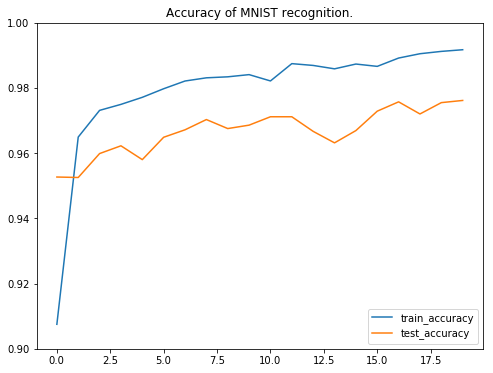

In [24]:
# 精度と誤差をグラフにして可視化する
plt.figure(figsize=(8 , 6))
plt.plot(np.arange(len(train_accuracy)) , train_accuracy)
plt.plot(np.arange(len(test_accuracy)) , test_accuracy)
plt.legend(["train_accuracy", "test_accuracy"], loc='lower right')
plt.title("Accuracy of MNIST recognition.")
plt.ylim([0.9, 1])
plt.plot()
plt.show()

In [25]:
# モデルを利用して予測をする関数を定義
def predict(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred = model.predictor(X[None, ...]).data.argmax()
    # データ数が2以上の場合はそのまま
    else:  
        pred = model.predictor(X).data.argmax(axis=1)
    return pred

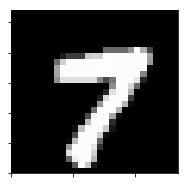

In [26]:
# testデータ内のサンプルをピックアップ
# indexを指定して任意の画像を選択
index = 1234
draw_digit(X_test[index])

In [27]:
# 予測を行い､答え合わせをする
pred = predict(model, X_test[index])
ans  = y_test[index]

print('predict: ', pred)
print('answer : ', ans)

if pred == ans:
    print('正解です｡')
else:
    print('不正解です')

predict:  7
answer :  7
正解です｡


In [28]:
# 混同行列を出力
# testデータに対して行うことに注意
from sklearn.metrics import confusion_matrix as cm
result = predict(model, X_test)
cm(result, y_test)

array([[1980,    1,    2,    1,    3,    2,    6,    3,    4,   10],
       [   0, 2387,    5,    1,    1,    1,    1,    7,    8,    2],
       [   4,    5, 2002,   20,    4,    2,    1,    7,    8,    3],
       [   0,    4,    4, 1999,    0,    9,    0,    2,   10,   12],
       [   1,    1,    7,    1, 2042,    1,    6,   12,    6,   38],
       [   2,    1,    1,   19,    1, 1866,    1,    4,   14,    8],
       [   7,    1,    4,    0,    6,   15, 2060,    0,    7,    1],
       [   1,    4,   10,    5,    1,    0,    0, 2138,    5,    6],
       [   9,    6,    7,   26,    2,    9,    2,    3, 2025,   13],
       [   4,    2,    3,   10,   18,   15,    1,   15,    6, 2000]])

In [29]:
# 混同行列をグラフで出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(np.arange(0, 10, 1)) # x軸の目盛りを指定
    plt.yticks(np.arange(0, 10, 1)) # y軸の目盛りを指定
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

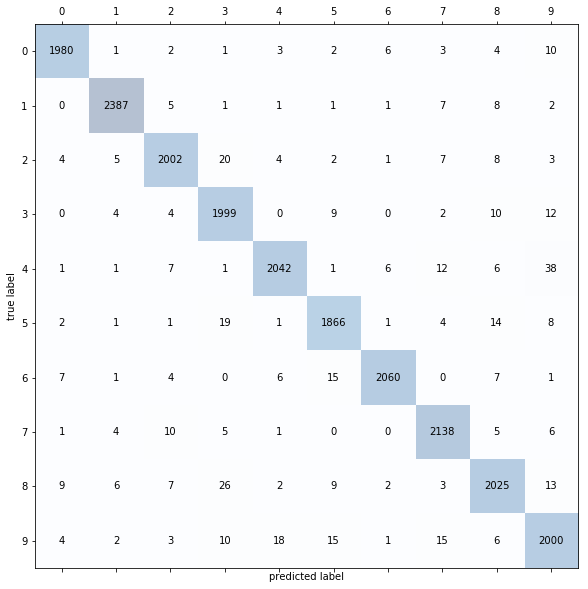

In [30]:
# 混同行列をグラフで出力
# testデータに対して行うことに注意
plot_cm(result, y_test)

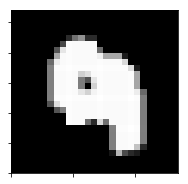

正解：9  予測：4


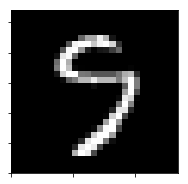

正解：9  予測：5


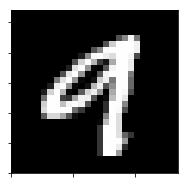

正解：9  予測：4


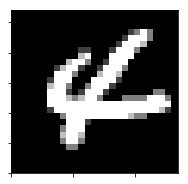

正解：4  予測：6


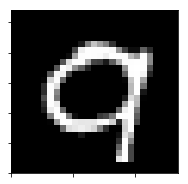

正解：9  予測：0


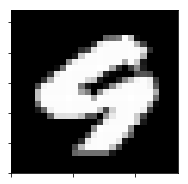

正解：9  予測：4


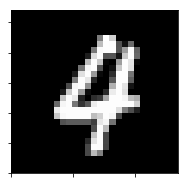

正解：4  予測：9


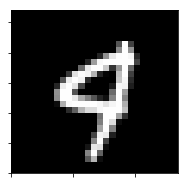

正解：4  予測：9


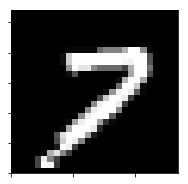

正解：4  予測：7


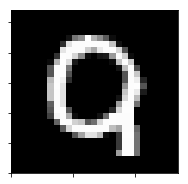

正解：9  予測：0


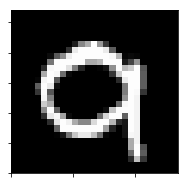

正解：9  予測：0


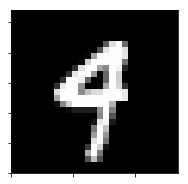

正解：9  予測：4


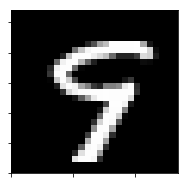

正解：9  予測：5


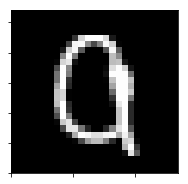

正解：9  予測：0


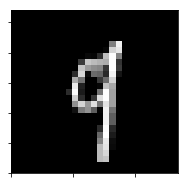

正解：9  予測：4


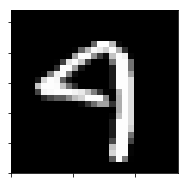

正解：4  予測：9


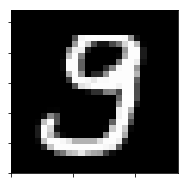

正解：9  予測：3


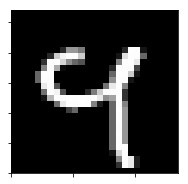

正解：9  予測：4


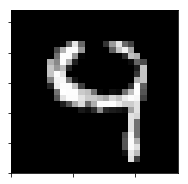

正解：9  予測：4


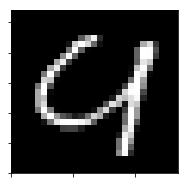

正解：9  予測：4


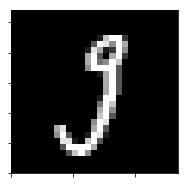

正解：9  予測：8


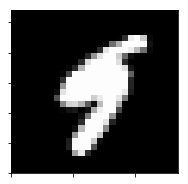

正解：9  予測：4


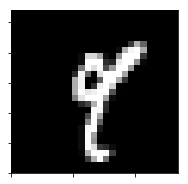

正解：9  予測：4


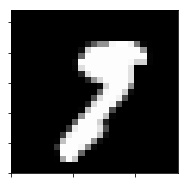

正解：9  予測：1


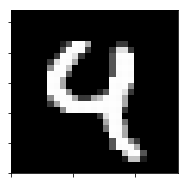

正解：9  予測：4


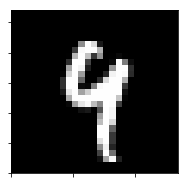

正解：9  予測：4


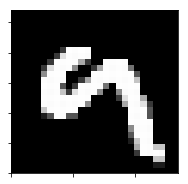

正解：9  予測：4


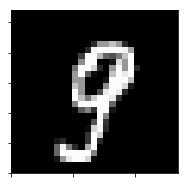

正解：9  予測：3


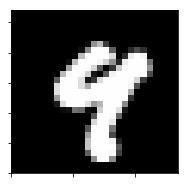

正解：4  予測：9


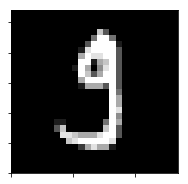

正解：9  予測：3


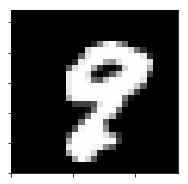

正解：9  予測：8


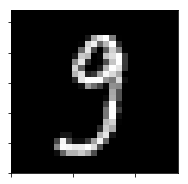

正解：9  予測：3


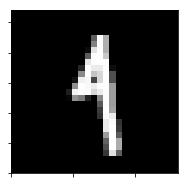

正解：4  予測：1


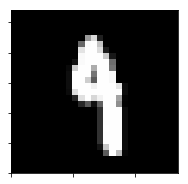

正解：4  予測：9


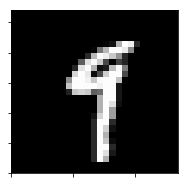

正解：9  予測：4


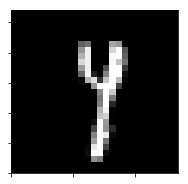

正解：4  予測：9


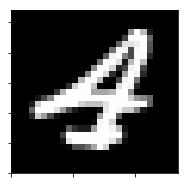

正解：4  予測：2


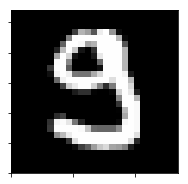

正解：9  予測：3


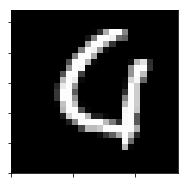

正解：4  予測：9


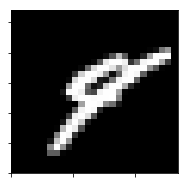

正解：4  予測：5


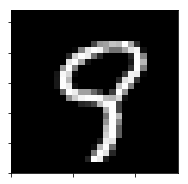

正解：9  予測：8


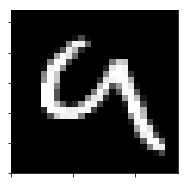

正解：9  予測：4


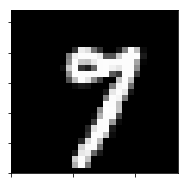

正解：9  予測：7


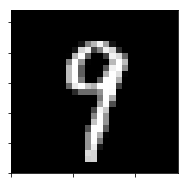

正解：9  予測：4


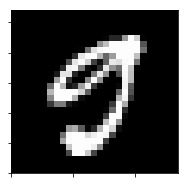

正解：9  予測：0


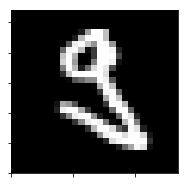

正解：9  予測：3


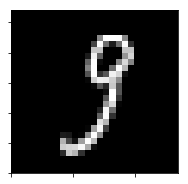

正解：9  予測：5


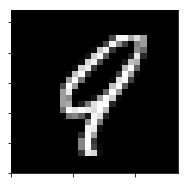

正解：9  予測：4


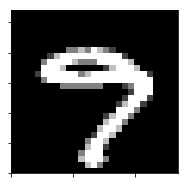

正解：9  予測：7


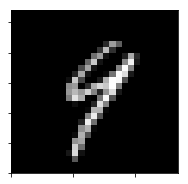

正解：9  予測：4


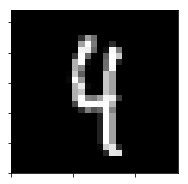

正解：4  予測：9


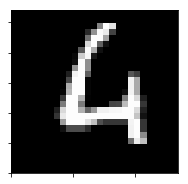

正解：4  予測：6


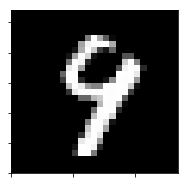

正解：9  予測：4


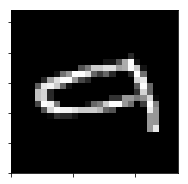

正解：9  予測：4


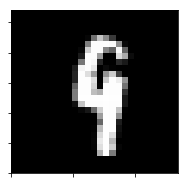

正解：9  予測：4


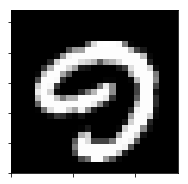

正解：9  予測：0


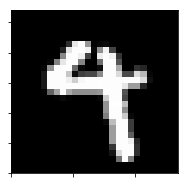

正解：4  予測：9


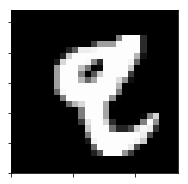

正解：9  予測：8


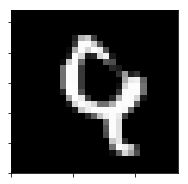

正解：9  予測：4


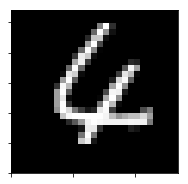

正解：4  予測：6


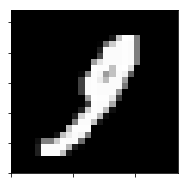

正解：9  予測：1


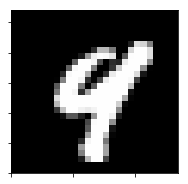

正解：9  予測：4


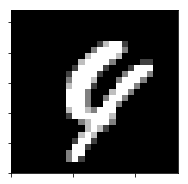

正解：4  予測：0


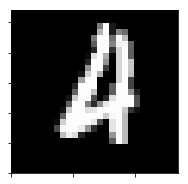

正解：4  予測：2


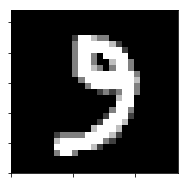

正解：9  予測：3


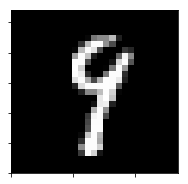

正解：9  予測：4


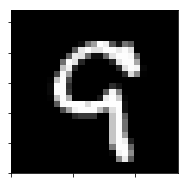

正解：9  予測：8


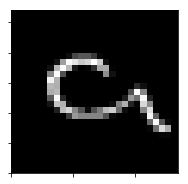

正解：9  予測：6


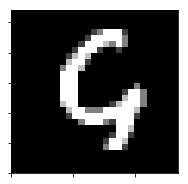

正解：9  予測：4


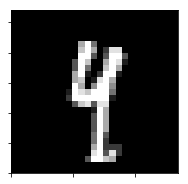

正解：4  予測：9


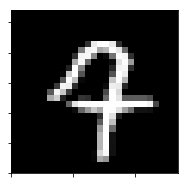

正解：9  予測：4


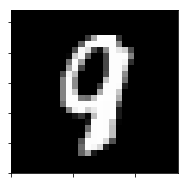

正解：9  予測：4


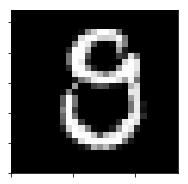

正解：9  予測：8


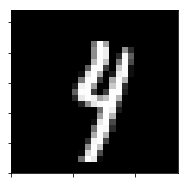

正解：4  予測：9


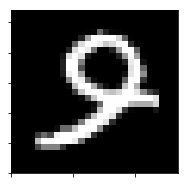

正解：9  予測：2


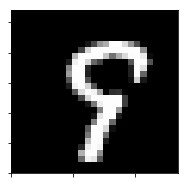

正解：9  予測：8


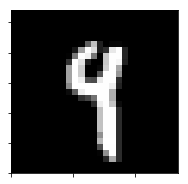

正解：9  予測：4


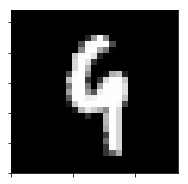

正解：9  予測：4


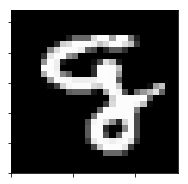

正解：9  予測：3


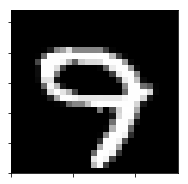

正解：9  予測：7


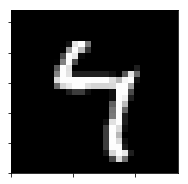

正解：4  予測：9


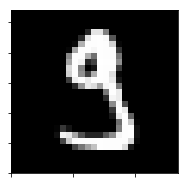

正解：9  予測：3


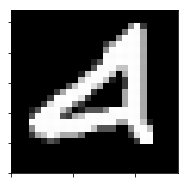

正解：4  予測：2


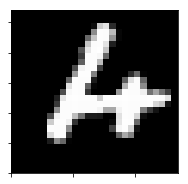

正解：4  予測：6


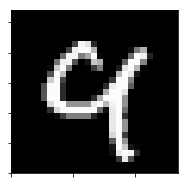

正解：9  予測：4


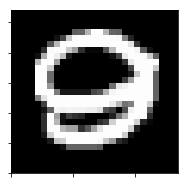

正解：9  予測：2


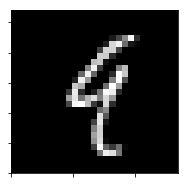

正解：9  予測：4


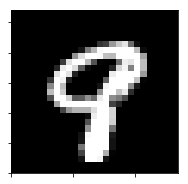

正解：9  予測：8


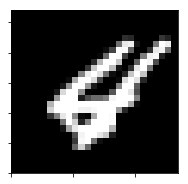

正解：4  予測：0


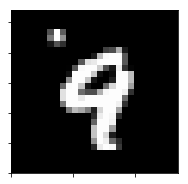

正解：9  予測：4


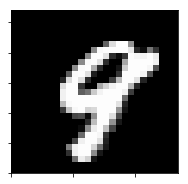

正解：9  予測：8


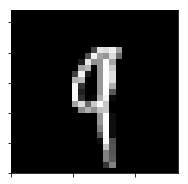

正解：9  予測：4


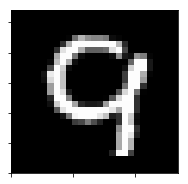

正解：9  予測：4


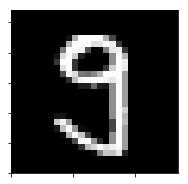

正解：9  予測：3


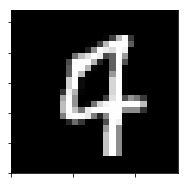

正解：4  予測：9


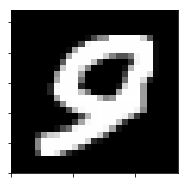

正解：9  予測：8


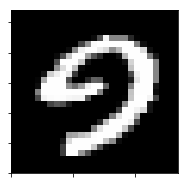

正解：9  予測：0


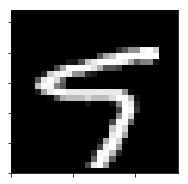

正解：9  予測：5


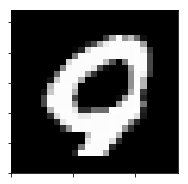

正解：9  予測：0


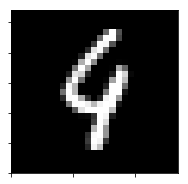

正解：4  予測：9


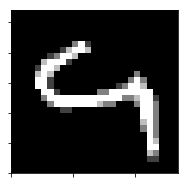

正解：4  予測：9


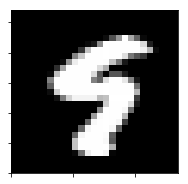

正解：9  予測：5


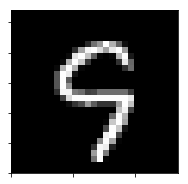

正解：9  予測：5


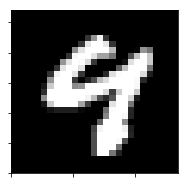

正解：9  予測：4


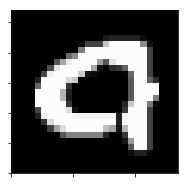

正解：4  予測：0


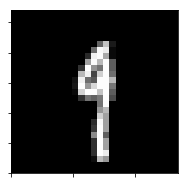

正解：9  予測：4


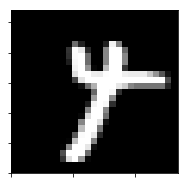

正解：4  予測：9


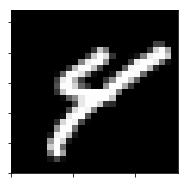

正解：4  予測：8


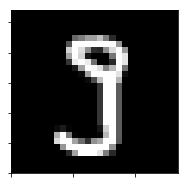

正解：9  予測：3


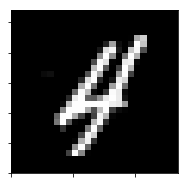

正解：4  予測：8


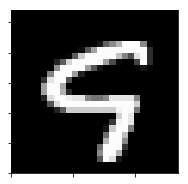

正解：9  予測：5


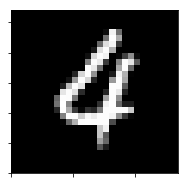

正解：4  予測：6


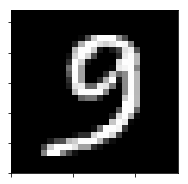

正解：9  予測：3


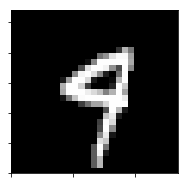

正解：4  予測：9


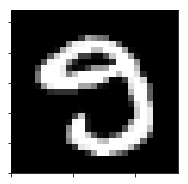

正解：9  予測：5


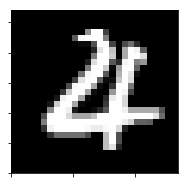

正解：4  予測：2


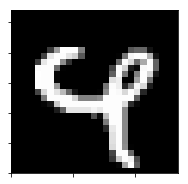

正解：9  予測：4


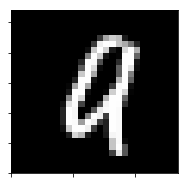

正解：9  予測：0


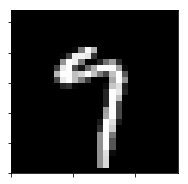

正解：9  予測：7


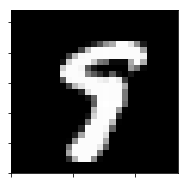

正解：9  予測：8


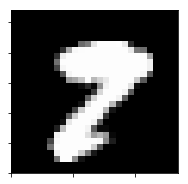

正解：9  予測：8


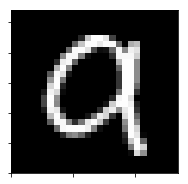

正解：9  予測：2


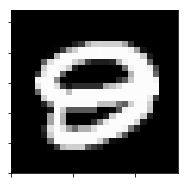

正解：9  予測：0


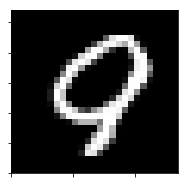

正解：9  予測：8


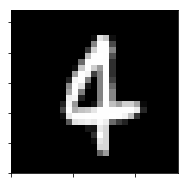

正解：4  予測：6


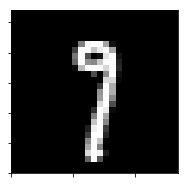

正解：9  予測：7


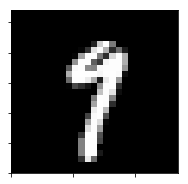

正解：9  予測：7


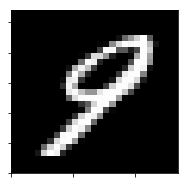

正解：9  予測：4


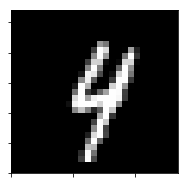

正解：4  予測：9


In [31]:
# 予想が外れたデータを5個表示
count = 0
for i in range(len(y_test)):
    pre = predict(model, X_test[i]) # 予測結果
    ans =  y_test[i]                # 正解
    
    # 正解が4か9のサンプルについてだけ確認
    if (ans != 9) and (ans != 4):
        continue
        
    # 予測が間違っていたらリストへ格納
    if pre != ans:
        count += 1
        draw_digit(X_test[i])
        print("正解：{}  予測：{}".format(ans, pre))

In [32]:
#show the nymber of errors
len(errors)

NameError: name 'errors' is not defined

In [33]:
# モデルの保存
# (ファイル名, 保存したいモデルの変数名)
serializers.save_npz('mnist.model', model)
print('Saved the model.')

Saved the model.


In [35]:
# モデルの読込
# (ファイル名, 読み込みたいモデルに与える変数名)
model_reloaded = L.Classifier(MLP())
serializers.load_npz('mnist.model', model_reloaded)
print('Loaded the model.')

Loaded the model.
